In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [146]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])

In [147]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### 看下数据的分布
https://blog.csdn.net/brucewong0516/article/details/80524442

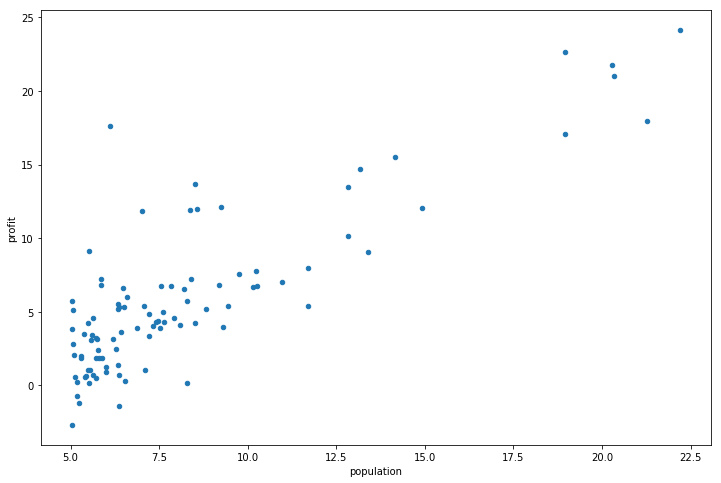

In [148]:
data.plot(x='population', y='profit', kind='scatter', figsize=(12, 8))
plt.show()

In [149]:
def compute_cost(X, y, theta):
    # 计算代价函数
    inner = np.power(((X@theta.T) - y), 2)
    return np.sum(inner) / (2*len(X))

### 插入一行数据，使数据操作矢量化
https://blog.csdn.net/W_weiying/article/details/85247436

In [150]:
data.insert(0, 'ones', value=1)

In [151]:
X = data.iloc[:,0:-1]
y = data.iloc[:, -1:]

In [152]:
X.head(), type(X)

(   ones  population
 0     1      6.1101
 1     1      5.5277
 2     1      8.5186
 3     1      7.0032
 4     1      5.8598, pandas.core.frame.DataFrame)

In [153]:
y.head(), type(y)

(    profit
 0  17.5920
 1   9.1302
 2  13.6620
 3  11.8540
 4   6.8233, pandas.core.frame.DataFrame)

转换数据为矩阵，并且初始化theta

In [154]:
X = np.matrix(X.values)
y1 = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [155]:
X.shape, y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

In [156]:
compute_cost(X, y, theta)

profit    32.072734
dtype: float64

### batch gradient descent 批梯度下降

In [157]:
def batch_gradinet_descent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    # 求出theta的个数
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X @ theta.T) -  y
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0,j] - alpha*np.sum(term)/len(X)
            
        theta = temp
        cost[i] = compute_cost(X, y, theta)
    
    return theta, cost
        

In [158]:
alpha = 0.01
iters = 1000

In [159]:
theta_ret, cost = batch_gradinet_descent(X, y, theta, alpha, iters)

In [160]:
theta_ret

matrix([[-3.24140214,  1.1272942 ]])

### 利用计算出来的theta，计算代价函数

In [161]:
compute_cost(X, y, theta_ret)

profit    4.515956
dtype: float64

利用计算出来的theta，去看看实际效果

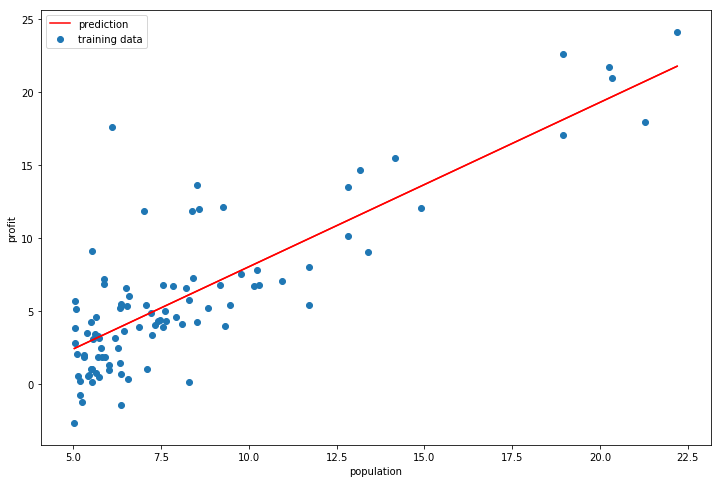

In [162]:
x = np.linspace(data.population.min(), data.population.max(), 100)
y = theta_ret[0,0] + theta_ret[0,1]*x

# 画图
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y, 'r', label='prediction')
ax.scatter(data.population, data.profit, label='training data')
ax.plot(x, y, 'r')
ax.set_xlabel('population')
ax.set_ylabel('profit')
ax.legend()
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

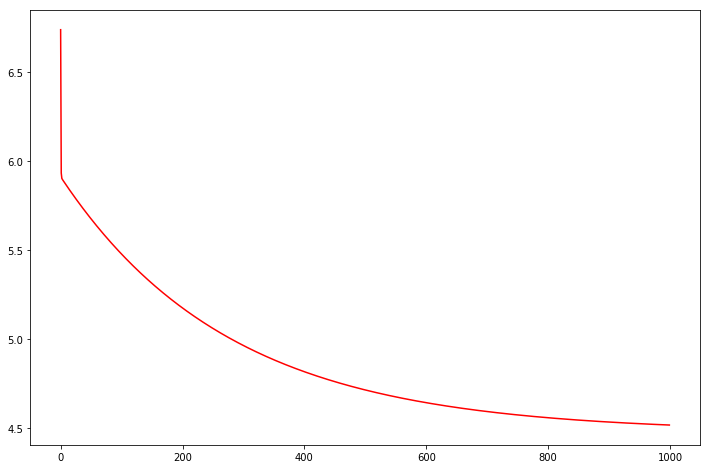

In [163]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
plt.show()

### 多变量线性回归

In [164]:
data2 = pd.read_csv('ex1data2.txt', names=['size', 'bedrooms', 'price'])
data2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### 特征缩放--归一化处理

In [165]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


对数据运行线性回归程序

In [166]:
data2.insert(0, 'ones', 1)

# 取X的值和y的值
X2 = data2.iloc[:, 0:-1]
y2 = data2.iloc[:, -1:]

X2 = np.matrix(X2)
y2 = np.matrix(y2)

theta2 = np.matrix([0, 0, 0])

In [167]:
theta_ret2, cost2 = batch_gradinet_descent(X2, y2, theta2, alpha, iters)

In [168]:
theta_ret2, cost2

(matrix([[-1.10957343e-16,  8.78503652e-01, -4.69166570e-02]]),
 array([0.4805491 , 0.47198588, 0.46366462, 0.45557814, 0.44771948,
        0.44008189, 0.43265881, 0.42544389, 0.41843096, 0.41161404,
        0.40498735, 0.39854524, 0.39228228, 0.38619317, 0.38027278,
        0.37451612, 0.36891839, 0.36347488, 0.35818107, 0.35303254,
        0.34802503, 0.34315438, 0.33841659, 0.33380775, 0.32932407,
        0.3249619 , 0.32071767, 0.31658793, 0.31256934, 0.30865863,
        0.30485268, 0.30114841, 0.29754287, 0.29403318, 0.29061655,
        0.28729027, 0.28405173, 0.28089837, 0.27782772, 0.27483739,
        0.27192505, 0.26908845, 0.26632541, 0.26363379, 0.26101154,
        0.25845666, 0.25596722, 0.25354134, 0.25117719, 0.248873  ,
        0.24662705, 0.24443769, 0.24230329, 0.24022228, 0.23819315,
        0.23621442, 0.23428466, 0.23240248, 0.23056652, 0.22877549,
        0.22702811, 0.22532316, 0.22365943, 0.22203576, 0.22045104,
        0.21890417, 0.21739409, 0.21591977, 0.214480

In [169]:
#　计算下代价函数
compute_cost(X2, y2, theta_ret2)

0.13070336960771892

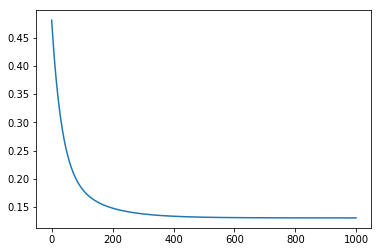

In [170]:
###　看下收敛过程
plt.plot(cost2)
plt.show()

### 使用scikit-learn中的线性回归
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [181]:
X.shape

(97, 2)

In [224]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

scikit-learn model的预测表现

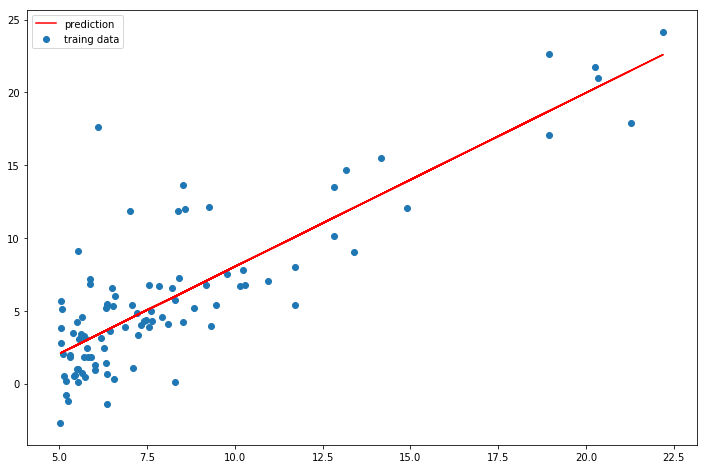

In [230]:
x = np.array(X)[:, 1]
f = model.predict(X).flatten()

fig2, ax2 = plt.subplots(figsize=(12, 8))
ax2.plot(x, f, 'r', label='prediction')
ax2.scatter(data.population, data.profit, label='traing data')
ax2.legend()
plt.show()

### 正规方程
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。 上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [233]:
def compute_equ(X, y):
    return np.linalg.inv(X.T@X)@X.T@y

In [234]:
compute_equ(X, y)

,profit
0,-3.895781
1,1.193034
